In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Two-Sample Test

First, we'll go through the example of my running times from 2018 and 2019. We can do this by getting ten random pulls from the normal distribution of our choosing, using the 'seed' function to ensure repeatability.

In [2]:
np.random.seed(42)
a = np.round(stats.norm(450, 40).rvs(10),0)
print(np.mean(a))
print(np.var(a, ddof=1))

468.0
836.6666666666666


In [3]:
np.random.seed(42)
b = np.round(stats.norm(400, 40).rvs(10),0)
print(np.mean(b))
print(np.var(b, ddof=1))

418.0
836.6666666666666


The difference in means between the two samples is -50

In [4]:
np.mean(b) - np.mean(a)

-50.0

Below is a custom function to calculate pooled variance from the equation, based on the formula from class.

In [5]:
def custom_pooled_variance(a, b):
    return ((((len(a) - 1) * np.var(a, ddof=1)) + ((len(b) - 1) * np.var(b, ddof=1))) / (len(a) + len(b) - 2)) * ((1/len(a)) + 1/len(b))

Below is the pooled variance of the two samples...

In [6]:
pooled_var = custom_pooled_variance(a, b)
pooled_var

167.33333333333334

And below is the pooled standard deviation of the two samples...

In [7]:
np.sqrt(pooled_var)

12.935738607954837

We can make a T distribution with a mean of 0 and our pooled standard deviation, along with 18 degrees of freedom (our combined number of samples minus 2).

We can use the CDF function to see the percentile of our sample mean. Clearly, we can rejct the null hypothesis that the two samples have the same mean.

In [8]:
stats.t(loc=0, scale=np.sqrt(pooled_var), df=18).cdf(-50)

0.0005669435253738896

For a one-sided test where our alternate hypothesis is that the difference between the means is negative, we can use the raw percentile value as our p-value.

For a one-sided test where our alternate hypothesis is that the difference between the means is positive, we can use 1 minus the raw percentile value as our p-value.

For a two-sided test, we can multiply the low percentile (0.5 or less) by 2 or 1 - the high percentile (0.5 or more) by 2 to find the p-value

In [9]:
#P-Value - One-Sided - Negative Difference
stats.t(loc=0, scale=np.sqrt(pooled_var), df=18).cdf(-50)

0.0005669435253738896

In [10]:
#P-Value - One-Sided - Positive Difference
1 - stats.t(loc=0, scale=np.sqrt(pooled_var), df=18).cdf(50)

0.0005669435253738975

In [11]:
#P-Value - Two-Sided
stats.t(loc=0, scale=np.sqrt(pooled_var), df=18).cdf(-50) * 2

0.0011338870507477791

In [12]:
#P-Value - One-Sided - Positive Difference
(1 - stats.t(loc=0, scale=np.sqrt(pooled_var), df=18).cdf(50)) * 2

0.001133887050747795

The stats also has a module to do a two-sided t-test to see if the sample means of two arrays are different.

In [13]:
stats.ttest_ind(a, b)

Ttest_indResult(statistic=3.8652605402255484, pvalue=0.0011338870507477791)

Text(0.5,0.92,'T-Distribution of Difference Between Samples')

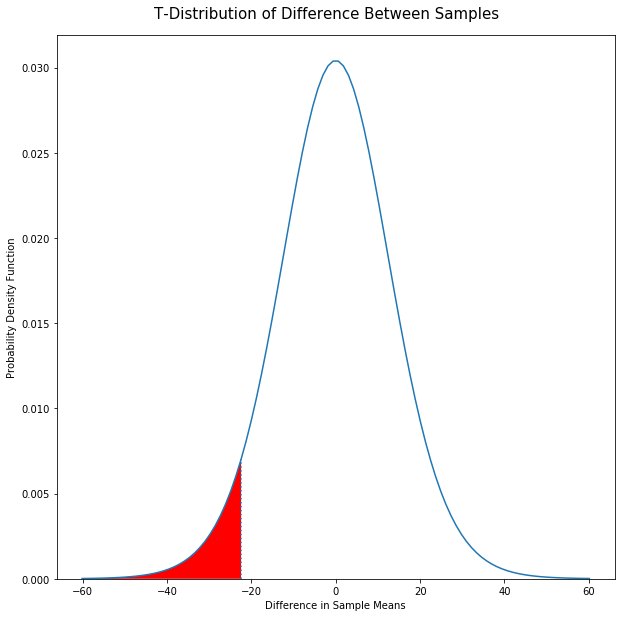

In [14]:
dist = stats.t(loc=0, scale=np.sqrt(pooled_var), df=18)
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.05), dist.ppf(0.05)],[0, dist.pdf(dist.ppf(0.05))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.0001), dist.ppf(0.05))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Difference in Sample Means')
plt.ylabel('Probability Density Function')
fig.suptitle('T-Distribution of Difference Between Samples', fontsize=15, y=0.92)

## Bootstrapping

### Running Example

Below we shuffle our two lists 10,000 times and get a list of 10,000 sample differences between our two lists.

In [15]:
np.random.seed(42)
diff = []
for i in range(10000):
    total = np.concatenate((a, b), axis=None)
    np.random.shuffle(total)
    new_a = total[:len(a)]
    new_b = total[len(b):]
    diff.append(np.mean(new_b) - np.mean(new_a))

In [16]:
np.mean(diff)

0.24456000000000003

Text(0.5,0.92,'Bootstrap Distribution of Difference Between Samples')

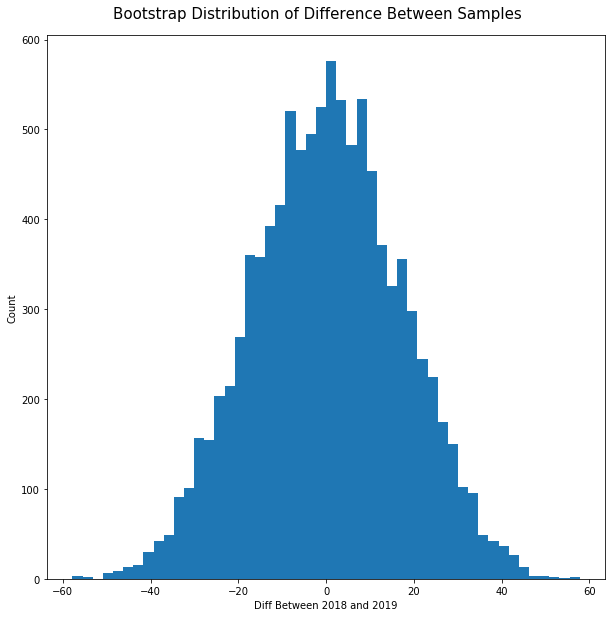

In [17]:
fig = plt.figure(figsize=(10,10))
plt.hist(diff, bins=50)
plt.xlabel('Diff Between 2018 and 2019')
plt.ylabel('Count')
fig.suptitle('Bootstrap Distribution of Difference Between Samples', fontsize=15, y=0.92)

The 'percentile' function in numpy gets the number value of a certain percentile in an array, which in this case will be 5, since we're doing a one-sided test at the 0.05 significance level.

In [18]:
np.percentile(diff, 5)

-28.0

The 'percentile of score' function gets the percentile of our value in the list, similar to the percentile point function (ppf) of a formal distribution

In [19]:
stats.percentileofscore(diff, -50)

0.06

In [20]:
np.array(diff)[np.array(diff) <= -50]

array([-53.4, -50.6, -56. , -57.8, -53.8, -57.8])

In [21]:
(6/10000) * 100

0.06

Note that the percentile value is 0.06 - specifically there are 6 random values out of 10,000 generated that are less than 10,000

### Voting Example

First we'll build a list of 'True' and 'False' to signify Republicans and Democrats who voted for and against the bill.

In [22]:
reps = np.array([True] * 215 + [False] * 6)
dems = np.array([True] * 81 + [False] * 126)

In [23]:
len(reps) + len(dems)

428

97% of Republicans voted for the bill, while 39% of Democrats voted for the bill. In total, 69% of the representatives voted 'yes' to the resolution.

In [24]:
np.sum(reps)/len(reps)

0.9728506787330317

In [25]:
np.sum(dems)/len(dems)

0.391304347826087

In [26]:
(np.sum(reps) + np.sum(dems)) / (len(reps) + len(dems))

0.6915887850467289

Now, 10,000 times, we'll combine the lists of republicans and democrats and shuffle them. Specifically we want to see, if we randomly pick 221 names out of the 428, how many times will at least 97% of the names we choose vote for the bill?

In [27]:
np.random.seed(42)
results = []
for i in range(10000):
    total = np.concatenate((reps, dems), axis=None)
    np.random.shuffle(total)
    new_dems = total[:len(dems)]
    new_reps = total[len(dems):]
    results.append(np.sum(new_reps)/len(new_reps))

Text(0.5,0.92,'Bootstrap Distribution of Republican Votes')

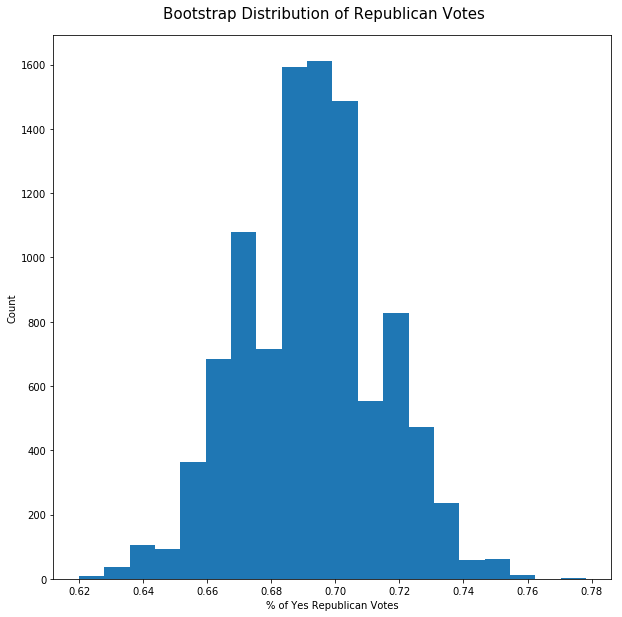

In [28]:
fig = plt.figure(figsize=(10,10))
plt.hist(results, bins=20)
plt.xlabel('% of Yes Republican Votes')
plt.ylabel('Count')
fig.suptitle('Bootstrap Distribution of Republican Votes', fontsize=15, y=0.92)

At a significance level of 0.05 (for a one-sided test), any value above 72.85% is in the rejection region.

In [29]:
np.percentile(results, 95)

0.7285067873303167

The value of 0.972 is in the 100th percentile of the list - indeed, there are no values in the list equal to or higher than it, and the max value generated randomly is actually 0.778. We can reject the null hypothesis that party affiliation did not affect whether a representative would vote for the resolution.

In [30]:
stats.percentileofscore(results, 0.972)

100.0

In [31]:
np.array(results)[np.array(results) >= 0.972]

array([], dtype=float64)

In [32]:
np.max(results)

0.7782805429864253

## Chi-Square

### Goodness of Fit - Dice Roll Simulation

First we can create the expected values for rolling 100 pairs of dice.

In [33]:
expected_results = []
for i in range(1,7):
    for j in range(1,7):
        total = i + j
        expected_results.append(total)
expected_values, expected_counts = np.unique(expected_results, return_counts=True)
np.transpose((expected_values, expected_counts/np.sum(expected_counts)))

array([[ 2.        ,  0.02777778],
       [ 3.        ,  0.05555556],
       [ 4.        ,  0.08333333],
       [ 5.        ,  0.11111111],
       [ 6.        ,  0.13888889],
       [ 7.        ,  0.16666667],
       [ 8.        ,  0.13888889],
       [ 9.        ,  0.11111111],
       [10.        ,  0.08333333],
       [11.        ,  0.05555556],
       [12.        ,  0.02777778]])

Above are the results that can come from rolling a pair of dice along with the probabilities of each outcome. We can multiply this percentage by 100 to get the expected number of times each of these outcomes will occur.

In [34]:
expected_counts_100 = expected_counts/np.sum(expected_counts) * 100
np.transpose((expected_values, expected_counts_100))

array([[ 2.        ,  2.77777778],
       [ 3.        ,  5.55555556],
       [ 4.        ,  8.33333333],
       [ 5.        , 11.11111111],
       [ 6.        , 13.88888889],
       [ 7.        , 16.66666667],
       [ 8.        , 13.88888889],
       [ 9.        , 11.11111111],
       [10.        ,  8.33333333],
       [11.        ,  5.55555556],
       [12.        ,  2.77777778]])

Now we'll simulate the results of 100 dice rolls by picking a random outcome between 2 and 12 100 times.

In [35]:
np.random.seed(42)
observed_results = []
for i in range(100):
    observed_results.append(np.random.randint(2,13))
observed_values, observed_counts = np.unique(observed_results, return_counts=True)
np.transpose((observed_values, observed_counts))

array([[ 2,  7],
       [ 3, 10],
       [ 4,  9],
       [ 5,  9],
       [ 6, 10],
       [ 7,  6],
       [ 8,  9],
       [ 9, 14],
       [10, 10],
       [11,  9],
       [12,  7]])

We can run the 'stats.chisquare' function to do a chi-square test on the two arrays.

In [36]:
stats.chisquare(observed_counts, expected_counts_100)

Power_divergenceResult(statistic=29.702, pvalue=0.0009582277855238355)

The chi-squared statistics here is 29.702, which we can recreate by manually executing the Chi-Square equation.

In [37]:
m = 0
for i in range(len(expected_counts_100)):
    x = np.power(expected_counts_100[i] - observed_counts[i], 2) / expected_counts_100[i]
    m += x
print(m)

29.702


We can also manually build out the chi-square distribution at 10 degrees of freedom to see where the rejection region is.

Text(0.5,0.92,'Chi-Square Distribution with 10 Degrees of Freedom')

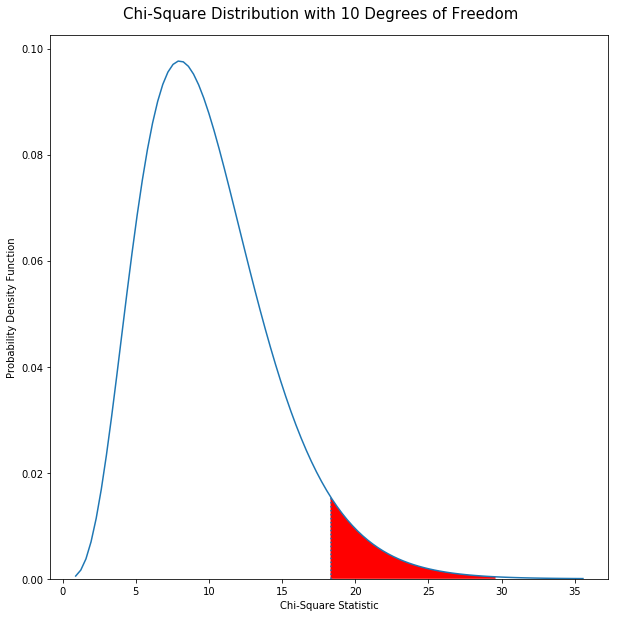

In [38]:
dist = stats.chi2(df=10)
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
#plt.plot([dist.ppf(0.025), dist.ppf(0.025)],[0, dist.pdf(dist.ppf(0.025))], linestyle='dotted', color='#1f77b4')
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density Function')
fig.suptitle('Chi-Square Distribution with 10 Degrees of Freedom', fontsize=15, y=0.92)

And below we can manually find the p-value found in the function.

In [39]:
(1 - stats.chi2(df=10).cdf(29.702))

0.0009582277855237908

The rejection region is any value above 18.3

In [40]:
stats.chi2(df=10).ppf(0.95)

18.307038053275146

### Homogeneity - Shakespeare

While the goodness of fit tests a distribution relative to its *expected values*, the homogeneity tests two discrete distributions against each other to see if they conceivably could come from the same distribution.

We could very easily do this with one line of code: the first value produced is the chi-squared value, the second value produced is the p-value, and the third and fourth values are the expected values for each distribution.

In [41]:
stats.chi2_contingency([[150,30,30,90], [90,20,10,80]])

(7.904411764705882, 0.048029091843219095, 3, array([[144.,  30.,  24., 102.],
        [ 96.,  20.,  16.,  68.]]))

We can also manually run the chi-square formula here to get the chi-squared value.

In [42]:
observed = [150,30,30,90,90,20,10,80]
expected = [144,30,24,102,96,20,16,68]
z = 0
for i in range(len(observed)):
    x = np.power(observed[i] - expected[i], 2) / expected[i]
    z += x
print(z)

7.904411764705882


Since there are four degrees in each distribution and two distributions total, the number of degrees of freedom is (4 - 1) \* (2 - 1), or 3 * 1 = 3.

We can confirm the p-value below.

In [43]:
1 - stats.chi2(3).cdf(7.904411764705882)

0.04802909184321913

The rejection region is any value that's 7.81 or higher.

In [44]:
stats.chi2(3).ppf(0.95)

7.814727903251179

Text(0.5,0.92,'Chi-Square Distribution with 10 Degrees of Freedom')

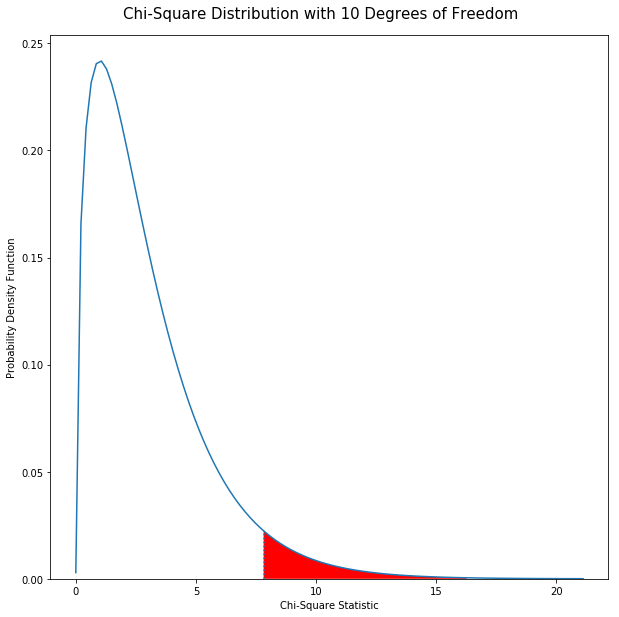

In [45]:
dist = stats.chi2(df=3)
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0000001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
#plt.plot([dist.ppf(0.025), dist.ppf(0.025)],[0, dist.pdf(dist.ppf(0.025))], linestyle='dotted', color='#1f77b4')
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density Function')
fig.suptitle('Chi-Square Distribution with 10 Degrees of Freedom', fontsize=15, y=0.92)